1 Задание

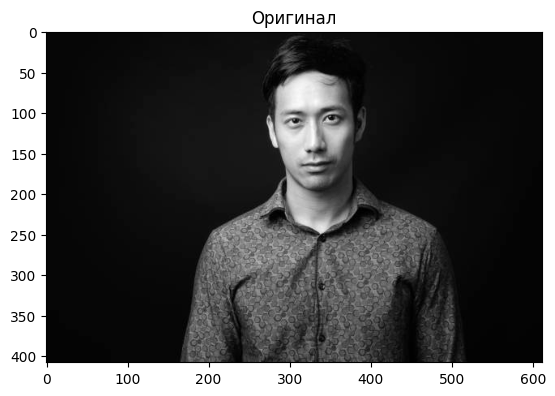

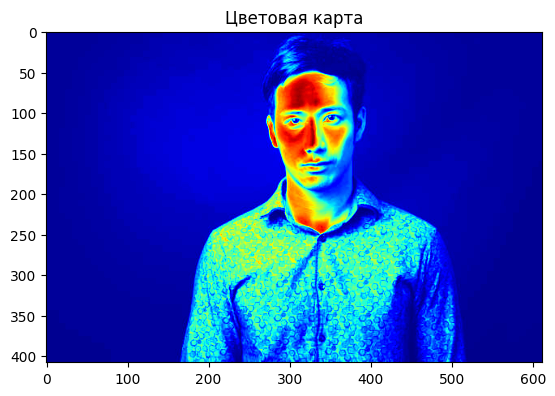

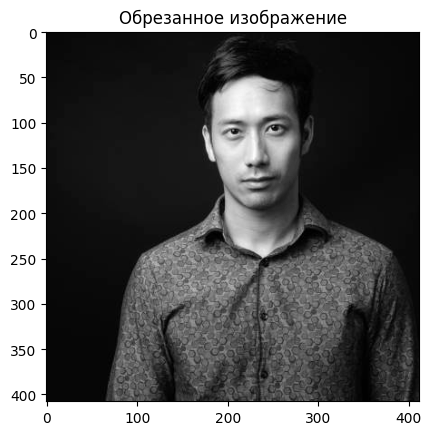

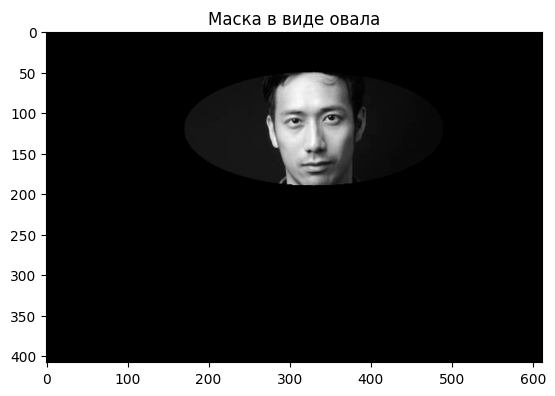

In [39]:
import matplotlib.pyplot as plt
import imageio
import numpy as np


image_path = r"C:\Users\redgn\Desktop\istockphoto-1319988165-612x612.jpg"
face = imageio.v2.imread(image_path)

face = face.astype(np.float64)

plt.imshow(face, cmap='gray')
plt.title('Оригинал')
plt.show()


plt.imshow(face, cmap='jet')
plt.title('Цветовая карта')
plt.show()


crop_face = face[:, 100:-100]
plt.imshow(crop_face, cmap='gray')
plt.title('Обрезанное изображение')
plt.show()

sy, sx = face.shape  

# Создайте сетку координат
y, x = np.ogrid[0:sy, 0:sx]
# Центр лица
centerx, centery = (330, 120)

a = 160  # большая полуось
b = 70  # малая полуось
mask = (((x - centerx)**2 / a**2) + ((y - centery)**2 / b**2)) > 1  

face[mask] = 0
plt.imshow(face, cmap='gray')
plt.title('Маска в виде овала')
plt.show()


2 Задание

Средняя популяция зайцев, рысей и моркови
[34080.95238095 20166.66666667 42400.        ]
Стандартная девиация
[20897.90645809 16254.59153691  3322.50622558]
Максимум зайцев был в 1903
Максимум рыси был в 1904
Максимум моркови был в 1900
Наибольшая популяция
1900: Морковь
1901: Морковь
1902: Заяц
1903: Заяц
1904: Рысь
1905: Рысь
1906: Морковь
1907: Морковь
1908: Морковь
1909: Морковь
1910: Морковь
1911: Морковь
1912: Заяц
1913: Заяц
1914: Заяц
1915: Рысь
1916: Морковь
1917: Морковь
1918: Морковь
1919: Морковь
1920: Морковь
Года, когда популяция больше 50000 [1902. 1903. 1904. 1912. 1913. 1914. 1915.]
Худшие года зайцев
[1917. 1916.]
Худшие года для рыси
[1900. 1901.]
Худшие года для моркови
[1916. 1903.]
Корреляция -0.9179248480315341


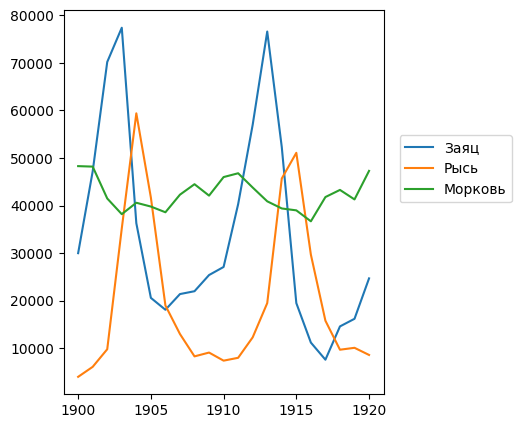

In [28]:
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt(r"C:\Users\redgn\Downloads\populations.txt")
year, hares, lynxes, carrots = data.T
population = data[:,1:]
# Вывод данных для проверки
print("Средняя популяция зайцев, рысей и моркови")
print(np.mean(population, axis = 0))
print("Стандартная девиация")
print(np.std(population, axis = 0))

max_hares = np.argmax(hares, axis=0)
print("Максимум зайцев был в", int(year[max_hares]))
max_lynxes = np.argmax(lynxes, axis=0)
print("Максимум рыси был в", int(year[max_lynxes]))
max_carrots = np.argmax(carrots, axis=0)
print("Максимум моркови был в", int(year[max_carrots]))

max_elem = np.argmax(population, axis=1)
elems = np.array(['Заяц', 'Рысь', 'Морковь'])
print("Наибольшая популяция")
for i in range(len(max_elem)):
    print(f"{int(year[i])}: {elems[max_elem[i]]}")

above_50000 = np.any(population > 50000, axis = 1)
print("Года, когда популяция больше 50000", year[above_50000])

low_years_hares = np.argsort(hares)[:2]
print("Худшие года зайцев")
print(year[low_years_hares])

low_years_lynxes = np.argsort(lynxes)[:2]
print("Худшие года для рыси")
print(year[low_years_lynxes])

low_years_carrots = np.argsort(carrots)[:2]
print("Худшие года для моркови")
print(year[low_years_carrots])

hare_grad = np.gradient(hares, 1.0)
print("Корреляция", np.corrcoef(hare_grad, lynxes)[0,1])

plt.axes([0.2, 0.1, 0.5, 0.8]) 

plt.plot(year, hares, year, lynxes, year, carrots) 

plt.legend(('Заяц', 'Рысь', 'Морковь'), loc=(1.05, 0.5)) 


3 Задание

C:\Users\redgn\AppData\Local\Temp\ipykernel_30536\2652753912.py:13: RuntimeWarning: overflow encountered in square
  z=z**2+c


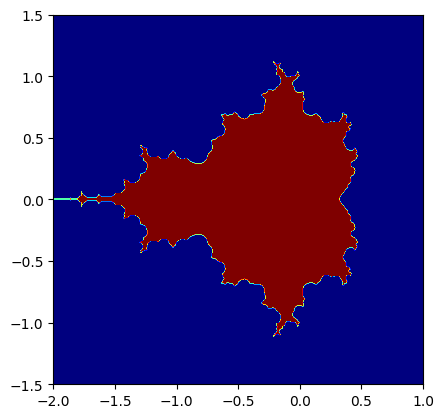

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_maldelbrot(N_max, some_threshold, nx, ny):
    x= np.linspace(-2,1, nx)
    y=np.linspace(-1.5,1.5, ny)

    c=x[:,newaxis]+1j*y[newaxis, :]

    z = c
    for j in range(N_max):
        z=z**2+c
    mandelbrot_set = (abs(z) < some_threshold)   

    return mandelbrot_set
mandelbrot_set = compute_maldelbrot(10,10,601,401)
plt.imshow(mandelbrot_set.T, extent=[-2,1,-1.5,1.5])
plt.jet()

4 Задание

In [38]:
import numpy as np

# Количество состояний
num_states = 5

# Создание случайной матрицы переходов/Первая часть
P = np.random.rand(num_states, num_states)
P = P / P.sum(axis=1, keepdims=True)
print(P)
# Создание случайного начального распределения/Вторая часть
p = np.random.rand(num_states)
p = p / p.sum()


print("Изначальное распределение вероятностей")
print(p)
#50 шагов
num_steps = 50
for _ in range(num_steps):
    p = np.dot(P.T, p)

print("Новое распределение вероятностей после 50 шагов:")
print(p)
# 3 часть

P_T = P.T

eigenvalues, eigenvectors = np.linalg.eig(P_T)
index = np.argmin(np.abs(eigenvalues - 1))
p_stationary = eigenvectors[:, index].real

p_stationary = p_stationary / p_stationary.sum()
equal = np.allclose(p, p_stationary, atol=1e-5)

print("50 steps и p_stationary равны с допуском 1e-5:", equal)




[[0.0946087  0.31072477 0.05879205 0.22742433 0.30845016]
 [0.08618914 0.09186003 0.12885264 0.38533266 0.30776553]
 [0.02078231 0.260288   0.26843542 0.11448611 0.33600815]
 [0.25083793 0.12951855 0.35010497 0.21003259 0.05950596]
 [0.12297735 0.17353433 0.21260223 0.21989492 0.27099117]]
Изначальное распределение вероятностей
[0.07084401 0.1573065  0.23471577 0.28888581 0.24824791]
Новое распределение вероятностей после 50 шагов:
[0.11895343 0.18416846 0.22231514 0.22560007 0.2489629 ]
50 steps и p_stationary равны с допуском 1e-5: True
